# internal wave beam reflecting against a slope

to do:

- [X] estimate the apparent wavelength theoretically


**References:**

- [Gerkema'book](https://www.vliz.be/imisdocs/publications/ocrd/60/307760.pdf) section 6.2


In [1]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt

import dashydro.theory as th


---
##  illustration for one parameter choice

Two cases:

- super-critical case: the wave is reflected back
- sub-critical case: the wave is **not** reflected back

Inputs: 

- beam shape $F$
- frequency $\omega$
- amplitude $w_0$
- stratification $N$
- Coriolis frequency $f$
- seafloor slope $\gamma$ : $z=\gamma x$


In [2]:
lat = 43
f = 2 *2*np.pi/86164.1 * np.sin(lat*np.pi/180)
N = 1e-3
gamma = -.1 # bathymetric slope

# iwave parameters
omega = f*1.01
m = 2*np.pi/100. # this is Gerkema's k ...

# incident wave
F = lambda xi: np.exp(-(xi/200.)**2)*np.exp(1j*m*xi)

# derive internal wave properties
mu =  th.get_mu(omega, f, N)
k = mu*m
lambda_x = 2*np.pi/k
lambda_z = 2*np.pi/m

# reflected wave
la =  th.get_lambda(omega, f, N,  gamma)
G = lambda xi: la*F(la*xi)

print(f" mu = {mu:.1e}, gamma={gamma:.2f}")
print(f" horizontal wavelength = {lambda_x:.1e} m, vertical wavelength={lambda_z:.1e}")


 mu = 1.4e-02, gamma=-0.10
 horizontal wavelength = 7.1e+03 m, vertical wavelength=1.0e+02


In [3]:
ds = xr.Dataset(dict(x=np.arange(-5e3,5e3,1e1),
                     z=np.arange(-1e3,1e3,5),
                    ))
ds = ds.assign_coords(h=-gamma*ds.x)

xi_p =  mu*ds.x - ds.z
xi_m = -mu*ds.x - ds.z

ds["F"] = F(xi_p).where(ds.z+0.*ds.x>-ds.h)
ds["G"] = G(xi_m).where(ds.z+0.*ds.x>-ds.h)

Text(0.5, 1.0, 'incident wave')

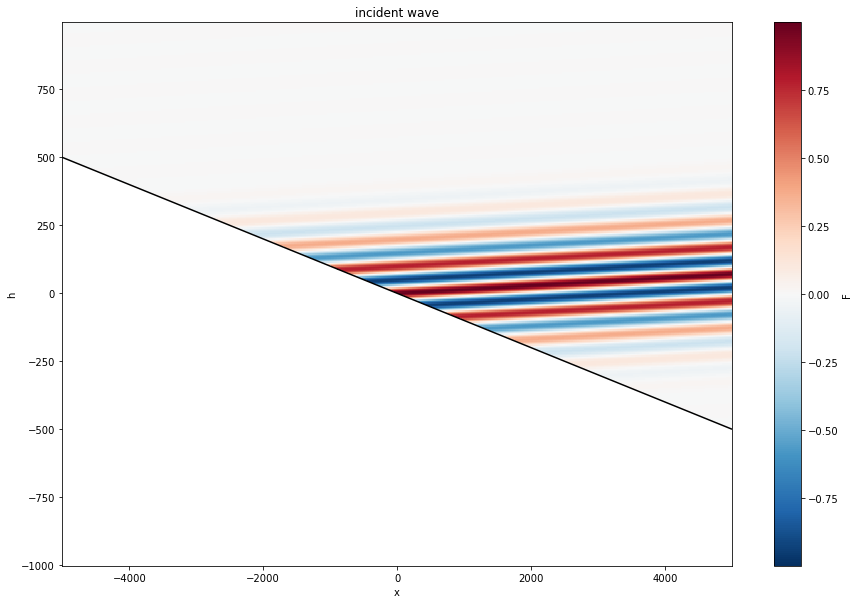

In [4]:
fig, ax = plt.subplots(1,1, figsize=(15,10))
np.real(ds.F).plot(x="x")
(-ds["h"]).plot(color="k")
ax.set_title("incident wave")

Check that the horizontal wavelength is indeed what's suppose to be.

Note how much larger ut us than what could imagine from the plot above.

Text(0.5, 1.0, 'incident wave')

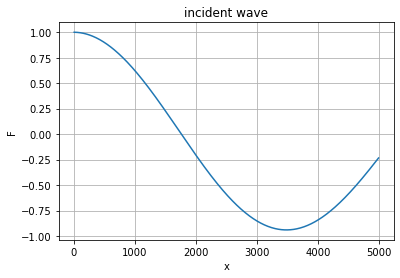

In [5]:
fig, ax = plt.subplots(1,1)
np.real(ds.F.sel(z=0)).plot(x="x")
#(-ds["h"]).plot(color="k")
ax.grid()
ax.set_title("incident wave")

Text(0.5, 1.0, 'reflected wave')

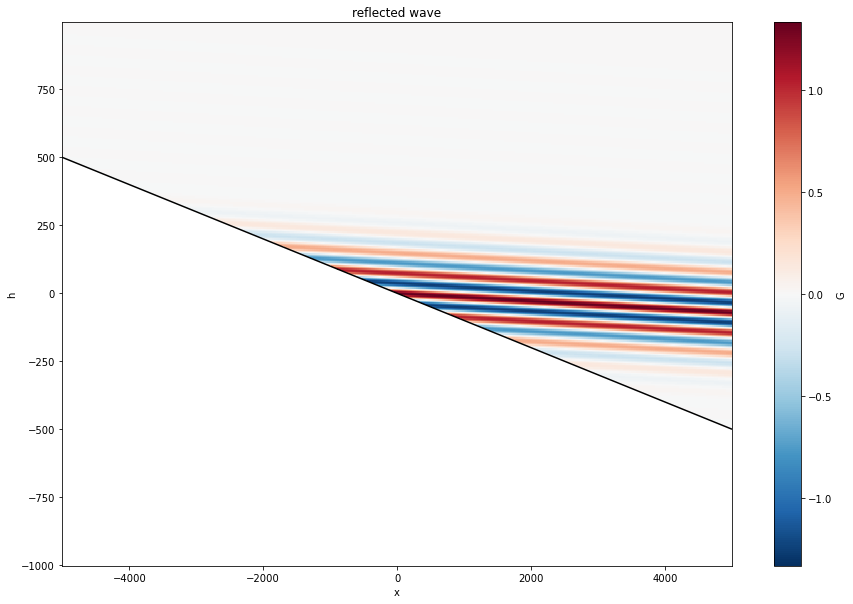

In [6]:
fig, ax = plt.subplots(1,1,figsize=(15,10))
np.real(ds.G).plot(x="x")
(-ds["h"]).plot(color="k")
ax.set_title("reflected wave")

Text(0.5, 1.0, 'total wave')

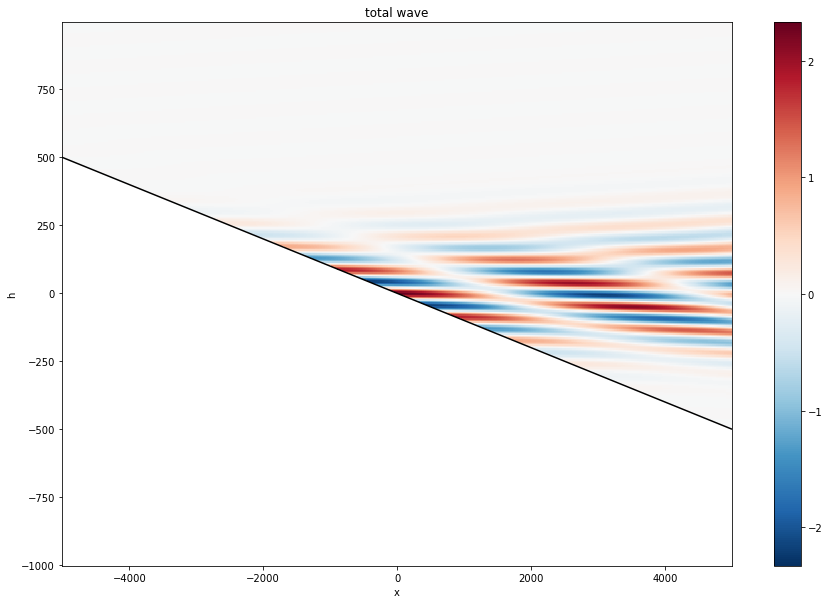

In [7]:
fig, ax = plt.subplots(1,1, figsize=(15,10))
np.real(ds.F+ds.G).plot(x="x")
(-ds["h"]).plot(color="k")
ax.set_title("total wave")

### signature along the seafloor


In [9]:
xi_p =  mu*ds.x - gamma*ds.x
xi_m = -mu*ds.x - gamma*ds.x

ds["F_bottom"] = F(xi_p)
ds["G_bottom"] = G(xi_m)

# along slope coordinate
ds = ds.assign_coords(s=abs(1+gamma**2)*ds.x)

Text(0.5, 0, 'horizontal direction [m]')

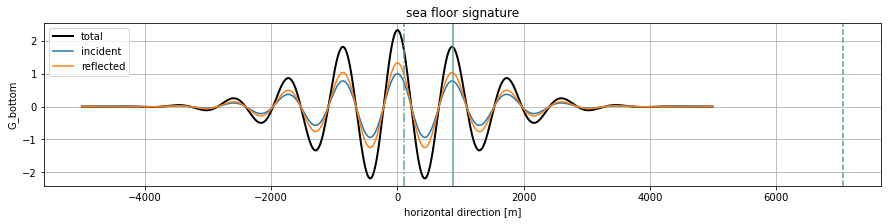

In [12]:
fig, ax = plt.subplots(1,1, figsize=(15,3))
np.real(ds.F_bottom+ds.G_bottom).plot(x="x", color="k", lw=2, label="total")
np.real(ds.F_bottom).plot(x="x", label="incident")
np.real(ds.G_bottom).plot(x="x", label="reflected")

# compare with other wavelengths
lambda_apparent_p = 2*np.pi/m/(mu-gamma)
ax.axvline(lambda_apparent_p, color="cadetblue", ls="-")
ax.axvline(lambda_x, color="cadetblue", ls="--")
ax.axvline(lambda_z, color="cadetblue", ls="-.")

ax.legend()
ax.grid()
ax.set_title("sea floor signature")
ax.set_xlabel("horizontal direction [m]")

Above, the apparent wavelength along the horizontal is given by $2\pi/[m(\mu-\gamma)]$. This is much smaller than the horizontal wavelength of the wave and longer than vertical wavelengths.

Text(0.5, 0, 'along slope coordinate [m]')

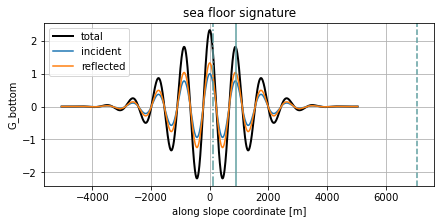

In [13]:
fig, ax = plt.subplots(1,1, figsize=(7,3))
np.real(ds.F_bottom+ds.G_bottom).plot(x="s", color="k", lw=2, label="total")
np.real(ds.F_bottom).plot(x="s", label="incident")
np.real(ds.G_bottom).plot(x="s", label="reflected")

# compare with other wavelengths
lambda_apparent_p = 2*np.pi/m/(mu-gamma)*np.sqrt(1+gamma**2)
ax.axvline(lambda_apparent_p, color="cadetblue", ls="-")
ax.axvline(lambda_x, color="cadetblue", ls="--")
ax.axvline(lambda_z, color="cadetblue", ls="-.")

ax.legend()
ax.grid()
ax.set_title("sea floor signature")
ax.set_xlabel("along slope coordinate [m]")

Above, the apparent wavelength along the along-slope coordinate is given by $2\pi \sqrt{1+\gamma^2}/[m(\mu-\gamma)]$ (very similar to apparent horizontal wavelength). This is also much smaller than the horizontal wavelength of the wave and longer than vertical wavelengths.

Text(0.5, 0, 'z [m]')

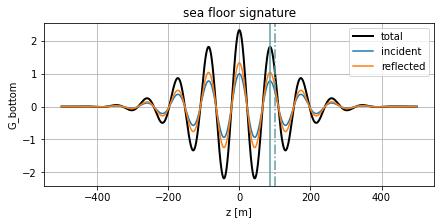

In [16]:
fig, ax = plt.subplots(1,1, figsize=(7,3))
np.real(ds.F_bottom+ds.G_bottom).plot(x="h", color="k", lw=2, label="total")
np.real(ds.F_bottom).plot(x="h", label="incident")
np.real(ds.G_bottom).plot(x="h", label="reflected")

# compare with other wavelengths
lambda_apparent_p = 2*np.pi/m/(mu-gamma)*abs(gamma)
ax.axvline(lambda_apparent_p, color="cadetblue", ls="-")
#ax.axvline(lambda_x, color="cadetblue", ls="--")
ax.axvline(lambda_z, color="cadetblue", ls="-.")

ax.legend()
ax.grid()
ax.set_title("sea floor signature")
ax.set_xlabel("z [m]")

Above: the apparent wavelength as a function of the depth coordinate is given by $2\pi \mu/[m(\mu-\gamma)]$. This is comparable but slightly smaller than that of the incident vertical wavelength.